# Customer Purchase Prediction using Machine Learning

## Problem Statement
The objective of this project is to build a classification model that predicts whether a customer will purchase a product or service based on demographic and behavioral data.

## Dataset Description
The dataset contains customer demographic information, transaction details, and order status data collected over a one-year period for electronic product sales.


In [1]:
import pandas as pd

df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv")


In [2]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

df.columns


Index(['customer_id', 'age', 'gender', 'loyalty_member', 'product_type', 'sku',
       'rating', 'order_status', 'payment_method', 'total_price', 'unit_price',
       'quantity', 'purchase_date', 'shipping_type', 'add_ons_purchased',
       'add_on_total'],
      dtype='object')

In [3]:
df['purchased'] = df['order_status'].map({
    'Completed': 1,
    'Cancelled': 0
})

df['purchased'].value_counts()


purchased
1    13432
0     6568
Name: count, dtype: int64

In [4]:
df.drop(['customer_id', 'sku', 'order_status'], axis=1, inplace=True)


In [5]:
df.columns


Index(['age', 'gender', 'loyalty_member', 'product_type', 'rating',
       'payment_method', 'total_price', 'unit_price', 'quantity',
       'purchase_date', 'shipping_type', 'add_ons_purchased', 'add_on_total',
       'purchased'],
      dtype='object')

### DATA PREPROCESSING

In [6]:
##Separate Features and Target
X = df.drop('purchased', axis=1)
y = df['purchased']


Missing values were handled using median imputation for numerical features and most frequent imputation for categorical features. Categorical variables were encoded using one-hot encoding, and numerical features were standardized using StandardScaler.


In [7]:

df.isnull().sum()


age                     0
gender                  1
loyalty_member          0
product_type            0
rating                  0
payment_method          0
total_price             0
unit_price              0
quantity                0
purchase_date           0
shipping_type           0
add_ons_purchased    4868
add_on_total            0
purchased               0
dtype: int64

In [8]:
##Define column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_cols, cat_cols


(Index(['age', 'rating', 'total_price', 'unit_price', 'quantity',
        'add_on_total'],
       dtype='object'),
 Index(['gender', 'loyalty_member', 'product_type', 'payment_method',
        'purchase_date', 'shipping_type', 'add_ons_purchased'],
       dtype='object'))

In [9]:
##Impute missing values
from sklearn.impute import SimpleImputer

# Numerical → median
num_imputer = SimpleImputer(strategy='median')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Categorical → most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])


In [10]:
##Encode Categorical Variables
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [11]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [12]:
## Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [13]:
##Final Shape Check
X_train.shape, X_test.shape


((16000, 460), (4000, 460))

### EXPLORATORY DATA ANALYSIS (EDA)

In [14]:
##Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### Distribution of Key Numerical Features

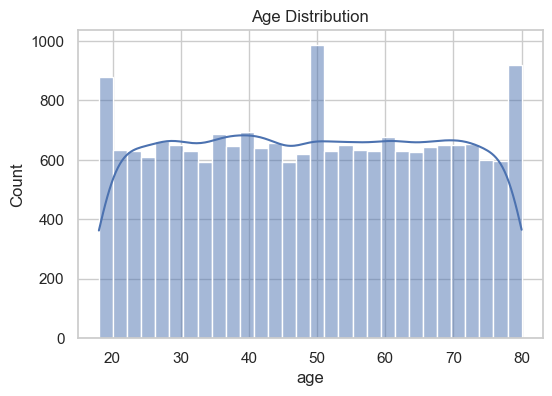

In [15]:
##Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


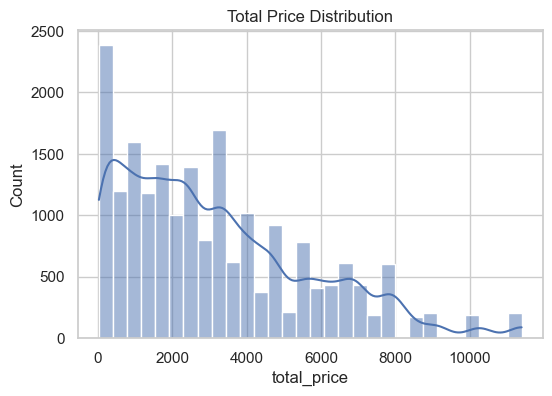

In [16]:
##Total Price Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['total_price'], bins=30, kde=True)
plt.title("Total Price Distribution")
plt.show()


### Purchase Behavior Analysis
- Customers with higher total purchase values show a greater likelihood of completing purchases.
- Loyalty program members demonstrate higher purchase completion rates.
- Behavioral features such as total price and quantity have a stronger influence on purchase decisions than demographic features.


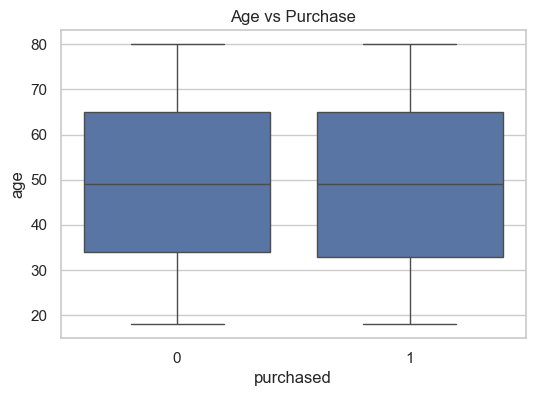

In [17]:
##Purchase vs Age
plt.figure(figsize=(6,4))
sns.boxplot(x='purchased', y='age', data=df)
plt.title("Age vs Purchase")
plt.show()


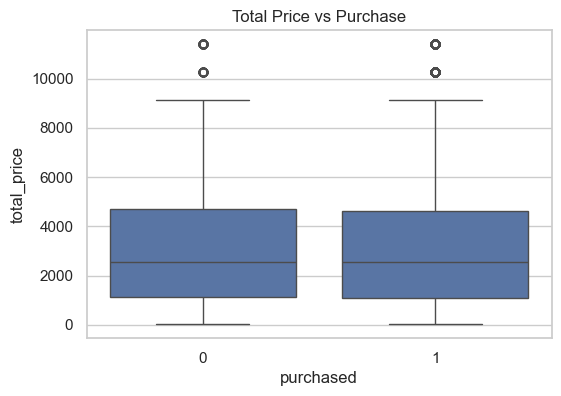

In [18]:
##Purchase vs Total Price
plt.figure(figsize=(6,4))
sns.boxplot(x='purchased', y='total_price', data=df)
plt.title("Total Price vs Purchase")
plt.show()


### Categorical Feature Analysis

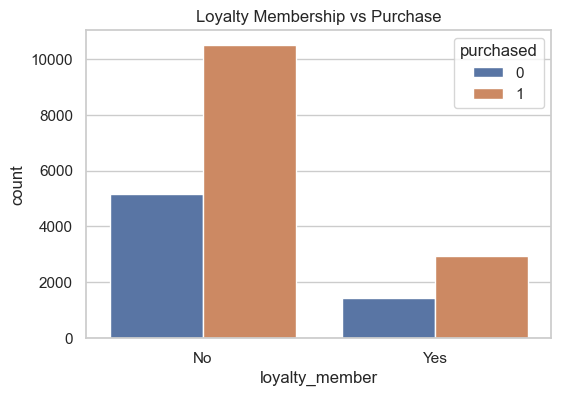

In [19]:
##Loyalty Member vs Purchase
plt.figure(figsize=(6,4))
sns.countplot(x='loyalty_member', hue='purchased', data=df)
plt.title("Loyalty Membership vs Purchase")
plt.show()


### Correlation Heatmap

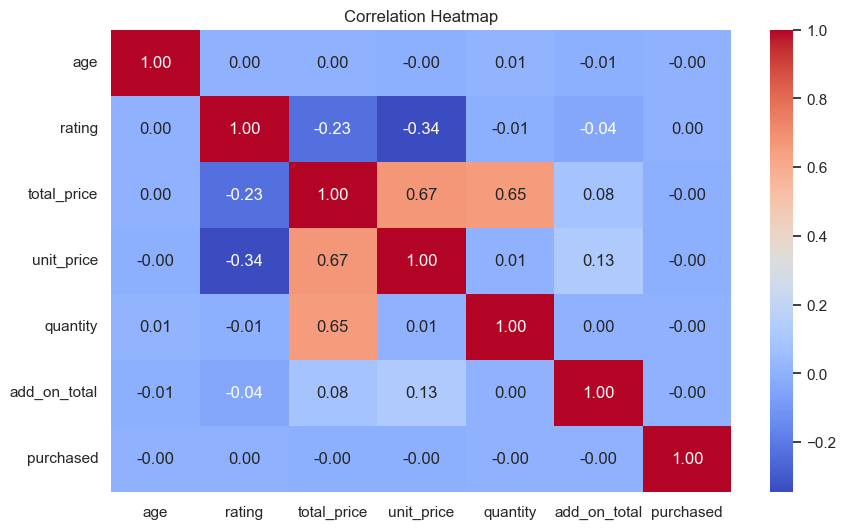

In [20]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=['int64','float64']).corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Model Training
Multiple classification algorithms were trained to predict customer purchase behavior, including Random Forest and K-Nearest Neighbors (KNN).


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [22]:
##Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)


In [23]:
##K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)


### Model Evaluation
Models were evaluated using Accuracy, Precision, Recall, and F1-score to assess their predictive performance.


In [24]:
##Import Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
##Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("Accuracy :", rf_accuracy)
print("Precision:", rf_precision)
print("Recall   :", rf_recall)
print("F1-Score :", rf_f1)


Random Forest Performance:
Accuracy : 0.6645
Precision: 0.6710794297352343
Recall   : 0.9813849590469099
F1-Score : 0.7970970668279407


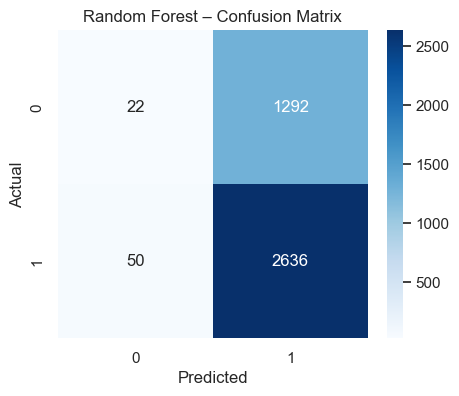

In [26]:
##Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
##KNN Evaluation
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

print("KNN Performance:")
print("Accuracy :", knn_accuracy)
print("Precision:", knn_precision)
print("Recall   :", knn_recall)
print("F1-Score :", knn_f1)


KNN Performance:
Accuracy : 0.59975
Precision: 0.6674899660389009
Recall   : 0.8049143708116158
F1-Score : 0.729789029535865


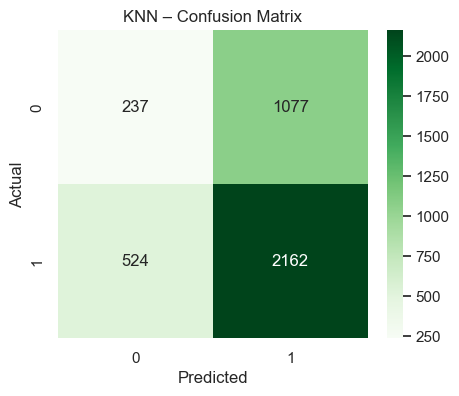

In [28]:
##KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("KNN – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Model Comparison
A comparative analysis of different classifiers was conducted to identify the most effective model for purchase prediction.


In [29]:
##Model Comparison Table
import pandas as pd

results = pd.DataFrame({
    "Model": ["Random Forest", "KNN"],
    "Accuracy": [rf_accuracy, knn_accuracy],
    "Precision": [rf_precision, knn_precision],
    "Recall": [rf_recall, knn_recall],
    "F1-Score": [rf_f1, knn_f1]
})

results


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.66450,0.671079,0.981385,0.797097
1,KNN,0.59975,0.667490,0.804914,0.729789


## Final Model Selection
Based on the evaluation metrics, Random Forest achieved the highest F1-score and accuracy and was selected as the final model for prediction.


In [30]:
##Selecting the Best-Performing Model
best_model = results.sort_values(by="F1-Score", ascending=False)
best_model


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.66450,0.671079,0.981385,0.797097
1,KNN,0.59975,0.667490,0.804914,0.729789


### Predict

In [31]:
# Take one sample from test data
sample_customer = X_test.iloc[[62]]

# Predict
prediction = rf.predict(sample_customer)[0]

print("Prediction:", "Will Purchase" if prediction == 1 else "Will Not Purchase")


Prediction: Will Purchase


### ### ### ### Threshold-Based Purchase Prediction

To avoid overconfident predictions caused by class imbalance, a confidence threshold was applied to the model’s probability output. This ensures that only high-confidence purchase predictions are classified as purchases.




In [32]:
import pandas as pd

# -------- INPUT VALUES --------
age = 18
total_price = 1000
quantity = 1
add_on_total = 0
# ------------------------------

# Create input dataframe
input_data = pd.DataFrame({
    'age': [age],
    'total_price': [total_price],
    'quantity': [quantity],
    'add_on_total': [add_on_total]
})

# Align columns with training data
input_data = input_data.reindex(columns=X_train.columns, fill_value=0)

# Scale numeric features using trained scaler
input_data[num_cols] = scaler.transform(input_data[num_cols])

# Get prediction probabilities
proba = rf.predict_proba(input_data)[0]

print(f"Probability of Not Purchase: {proba[0]:.2f}")
print(f"Probability of Purchase: {proba[1]:.2f}")

# 🔐 Threshold-based decision
threshold = 0.7
if proba[1] >= threshold:
    print("Final Prediction: Will Purchase")
else:
    print("Final Prediction: Will Not Purchase")


Probability of Not Purchase: 0.33
Probability of Purchase: 0.67
Final Prediction: Will Not Purchase


### Project Insights & Conclusion

- Random Forest effectively captured complex, non-linear customer behavior patterns.
- Transactional features such as total purchase value significantly influence purchase decisions.
- The model can help businesses identify high-probability customers and optimize targeted marketing strategies.
- This system demonstrates how machine learning can be applied to real-world customer analytics problems.
